In [145]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome("chromedriver.exe")

In [3]:
driver.get("https://naver.com") # url 접속

In [4]:
html = driver.page_source

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/e
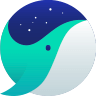
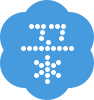

In [5]:
html

In [6]:
# 멜론 인기차트 데이터 가져오기

In [7]:
driver.get("https://www.melon.com/chart/index.htm")

In [8]:
html = driver.page_source
html

'<html lang="ko" class="narrow-screen"><head>\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;24H&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.com/chart/index.htm">\n\t<meta property="og:type" content="website">\n\t<meta name="viewp

In [146]:
from bs4 import BeautifulSoup

In [10]:
soup = BeautifulSoup(html, "html.parser")
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;24H&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1" name="naver-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="width=device-width" name="viewport"/>
<link href="/favicon.ico?2" id="favicon" rel="s

In [11]:
len(soup.select("tr"))

101

In [12]:
songs = soup.select("tr")
songs[0] # 0은 노래정보가아닌 맨위에 메뉴 테이블

<tr>
<th scope="col">
<div class="wrap t_right"><input class="input_check d_checkall" title="곡 목록 전체 선택" type="checkbox"/></div>
</th>
<th scope="col">
<div class="wrap none">앨범이미지</div>
</th>
<th scope="col">
<div class="wrap none">곡 상세가기</div>
</th>
<th scope="col">
<div class="wrap pd_l_12">곡정보</div>
</th>
<th scope="col">
<div class="wrap pd_l_12">앨범</div>
</th>
<th scope="col">
<div class="wrap pd_l_30">좋아요</div>
</th>
<th scope="col">
<div class="wrap t_center">듣기</div>
</th>
<th scope="col">
<div class="wrap t_center">담기</div>
</th>
<th scope="col">
<div class="wrap t_center">다운</div>
</th>
<th scope="col">
<div class="wrap t_center">뮤비</div>
</th>
</tr>

In [13]:
songs = soup.select("tr")[1:] # 타이틀을 제외하고 100곡 추출

In [14]:
song = songs[0]
title = song.select("a")
len(title)
title

[<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10638275');" title="MSG워너비 1집">
 <img alt="MSG워너비 1집 - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/106/38/275/10638275_20210625172521_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>,
 <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('33625988');" title="바라만 본다 곡정보"><span class="none">곡정보</span></a>,
 <a href="javascript:melon.play.playSong('19030101',33625988);" title="바라만 본다 재생">바라만 본다</a>,
 <a href="javascript:melon.link.goArtistDetail('2939212');" title="MSG워너비(M.O.M) - 페이지 이동">MSG워너비(M.O.M)</a>,
 <a href="javascript:melon.link.goArtistDetail('2939212');" title="MSG워너비(M.O.M) - 페이지 이동">MSG워너비(M.O.M)</a>,
 <a href="javascript:melon.link.goAlbumDetail('10638275');" title="MSG워너비 1집 - 페이지 이동">MSG워너비 1집</a>]

In [15]:
len(song.select("span"))
song.select("span > a")[0].string

'바라만 본다'

In [16]:
len(song.select("div"))
song.select("div.ellipsis.rank01>span>a")[0].string # 클래스 이름이 2개인 경우 마침표를 하나 더 찍어주면 됨

'바라만 본다'

In [17]:
song.select("div.ellipsis.rank02 > a")[0].text

'MSG워너비(M.O.M)'

In [18]:
songs
# 노래제목, 가수명에서 상위 30위까지 출력

[<tr data-song-no="33625988">
 <td><div class="wrap t_right"><input class="input_check" name="input_check" title="바라만 본다 곡 선택" type="checkbox" value="33625988"/></div></td>
 <td><div class="wrap">
 <a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10638275');" title="MSG워너비 1집">
 <img alt="MSG워너비 1집 - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/106/38/275/10638275_20210625172521_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
 <span class="bg_album_frame"></span>
 </a>
 </div></td>
 <td><div class="wrap">
 <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('33625988');" title="바라만 본다 곡정보"><span class="none">곡정보</span></a>
 </div></td>
 <td><div class="wrap">
 <div class="wrap_song_info">
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('19030101',33625988);" title="바라만 본다 재생">바라만 본다</a>
 </span></div>
 <br/>
 <div class="ellips

In [19]:
song2 = songs[:31]
for i in song2:
    print(i.select("div.ellipsis.rank01>span>a")[0].string,"-",i.select("div.ellipsis.rank02 > a")[0].string)

바라만 본다 - MSG워너비(M.O.M)
Next Level - aespa
신호등 - 이무진
Permission to Dance - 방탄소년단
Butter - 방탄소년단
Weekend - 태연 (TAEYEON)
헤픈 우연 - 헤이즈 (Heize)
치맛바람 (Chi Mat Ba Ram) - 브레이브걸스
Dun Dun Dance - 오마이걸 (OH MY GIRL)
Peaches (Feat. Daniel Caesar & Giveon) - Justin Bieber
나를 아는 사람 - MSG워너비(정상동기)
롤린 (Rollin') - 브레이브걸스
Alcohol-Free - TWICE (트와이스)
Dynamite - 방탄소년단
라일락 - 아이유
좋아좋아 - 조정석
ASAP - STAYC(스테이씨)
비와 당신 - 이무진
하루만 더 - 빅마마
안녕 (Hello) - 조이 (JOY)
Celebrity - 아이유
운전만해 (We Ride) - 브레이브걸스
상상더하기 - MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)
사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco) - 호미들
상상더하기 - 라붐 (LABOUM)
Timeless - SG 워너비
멜로디 - ASH ISLAND
내 손을 잡아 - 아이유
밝게 빛나는 별이 되어 비춰줄게 - 송이한
넌 좋은 사람 - SG 워너비
OHAYO MY NIGHT - 디핵 (D-Hack)


In [20]:
song2 = songs[:31]
for i in song2:
    print(i.select_one("div.ellipsis.rank01>span>a").string,"-",i.select_one("div.ellipsis.rank02 > a").string)

바라만 본다 - MSG워너비(M.O.M)
Next Level - aespa
신호등 - 이무진
Permission to Dance - 방탄소년단
Butter - 방탄소년단
Weekend - 태연 (TAEYEON)
헤픈 우연 - 헤이즈 (Heize)
치맛바람 (Chi Mat Ba Ram) - 브레이브걸스
Dun Dun Dance - 오마이걸 (OH MY GIRL)
Peaches (Feat. Daniel Caesar & Giveon) - Justin Bieber
나를 아는 사람 - MSG워너비(정상동기)
롤린 (Rollin') - 브레이브걸스
Alcohol-Free - TWICE (트와이스)
Dynamite - 방탄소년단
라일락 - 아이유
좋아좋아 - 조정석
ASAP - STAYC(스테이씨)
비와 당신 - 이무진
하루만 더 - 빅마마
안녕 (Hello) - 조이 (JOY)
Celebrity - 아이유
운전만해 (We Ride) - 브레이브걸스
상상더하기 - MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)
사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco) - 호미들
상상더하기 - 라붐 (LABOUM)
Timeless - SG 워너비
멜로디 - ASH ISLAND
내 손을 잡아 - 아이유
밝게 빛나는 별이 되어 비춰줄게 - 송이한
넌 좋은 사람 - SG 워너비
OHAYO MY NIGHT - 디핵 (D-Hack)


In [222]:
# 멜론 크롤링 -> 엑셀 저장 -> pandas

for song in songs[:30]:
    print(song.select('span > a')[0].string, '-', song.select('div.ellipsis.rank02 > a')[0].string)
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('chromedriver.exe')
url = 'http://www.melon.com/chart/index.htm'
driver.get(url)     

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
song_data = []
rank = 1

songs = soup.select('table > tbody > tr')
for song in songs:                                        
    title = song.select('div.rank01 > span > a')[0].text
    singer = song.select('div.rank02 > a')[0].text
    song_data.append(['Melon', rank, title, singer])
    rank +=1

바라만 본다 - MSG워너비(M.O.M)
Next Level - aespa
신호등 - 이무진
Permission to Dance - 방탄소년단
Butter - 방탄소년단
Weekend - 태연 (TAEYEON)
헤픈 우연 - 헤이즈 (Heize)
치맛바람 (Chi Mat Ba Ram) - 브레이브걸스
Dun Dun Dance - 오마이걸 (OH MY GIRL)
Peaches (Feat. Daniel Caesar & Giveon) - Justin Bieber
나를 아는 사람 - MSG워너비(정상동기)
롤린 (Rollin') - 브레이브걸스
Alcohol-Free - TWICE (트와이스)
Dynamite - 방탄소년단
라일락 - 아이유
좋아좋아 - 조정석
ASAP - STAYC(스테이씨)
비와 당신 - 이무진
하루만 더 - 빅마마
안녕 (Hello) - 조이 (JOY)
Celebrity - 아이유
운전만해 (We Ride) - 브레이브걸스
상상더하기 - MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)
사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco) - 호미들
상상더하기 - 라붐 (LABOUM)
Timeless - SG 워너비
멜로디 - ASH ISLAND
내 손을 잡아 - 아이유
밝게 빛나는 별이 되어 비춰줄게 - 송이한
넌 좋은 사람 - SG 워너비


In [26]:
song_data # 리스트의 리스트

import pandas as pd

In [23]:
song_data

[['Melon', 1, '바라만 본다', 'MSG워너비(M.O.M)'],
 ['Melon', 2, 'Next Level', 'aespa'],
 ['Melon', 3, '신호등', '이무진'],
 ['Melon', 4, 'Permission to Dance', '방탄소년단'],
 ['Melon', 5, 'Butter', '방탄소년단'],
 ['Melon', 6, 'Weekend', '태연 (TAEYEON)'],
 ['Melon', 7, '헤픈 우연', '헤이즈 (Heize)'],
 ['Melon', 8, '치맛바람 (Chi Mat Ba Ram)', '브레이브걸스'],
 ['Melon', 9, 'Dun Dun Dance', '오마이걸 (OH MY GIRL)'],
 ['Melon', 10, 'Peaches (Feat. Daniel Caesar & Giveon)', 'Justin Bieber'],
 ['Melon', 11, '나를 아는 사람', 'MSG워너비(정상동기)'],
 ['Melon', 12, "롤린 (Rollin')", '브레이브걸스'],
 ['Melon', 13, 'Alcohol-Free', 'TWICE (트와이스)'],
 ['Melon', 14, 'Dynamite', '방탄소년단'],
 ['Melon', 15, '라일락', '아이유'],
 ['Melon', 16, '좋아좋아', '조정석'],
 ['Melon', 17, 'ASAP', 'STAYC(스테이씨)'],
 ['Melon', 18, '비와 당신', '이무진'],
 ['Melon', 19, '하루만 더', '빅마마'],
 ['Melon', 20, '안녕 (Hello)', '조이 (JOY)'],
 ['Melon', 21, 'Celebrity', '아이유'],
 ['Melon', 22, '운전만해 (We Ride)', '브레이브걸스'],
 ['Melon',
  23,
  '상상더하기',
  'MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)'],
 ['Me

In [24]:
data = pd.DataFrame(song_data,columns = ["멜론", "순위", "제목", "가수"])
data.head() # 상위순위만 보여줘라

,멜론,순위,제목,가수
0,Melon,1,바라만 본다,MSG워너비(M.O.M)
1,Melon,2,Next Level,aespa
2,Melon,3,신호등,이무진
3,Melon,4,Permission to Dance,방탄소년단
4,Melon,5,Butter,방탄소년단


In [25]:
# 위에 표를 엑셀로 저장하기
data.to_excel("melon.xlsx", index = False) # index는 저장하지말아라!

PermissionError: [Errno 13] Permission denied: 'melon.xlsx'

In [ ]:
# 유튜브 데이터 추출

In [29]:
browser = webdriver.Chrome("chromedriver.exe") # 크롬 웹드라이버를 통한 창 열기

In [30]:
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"

In [31]:
browser.get(url) # 드라이버에서 url을 열어라

In [32]:
html = browser.page_source # page source 가져오기
soup = BeautifulSoup(html, "html.parser") # source code를 html 문법에 맞게 해주기

In [33]:
soup

<html lang="ko"><head>
<meta charset="utf-8"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>유튜브 랭킹 1 페이지</title>
<link href="https://youtube-rank.com/css/default.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/bootstrap.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/nifty.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/premium/icon-sets/icons/line-icons/premium-line-icons.min.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/css/themes/type-c/theme-well-red.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/theme/youtube/skin/outlogin/youtuberank/style.css?ver=191202" rel="stylesheet"/>
<link href="https://youtube-rank.com/board/skin/board/sns_channel/list.skin.css?191202" rel="stylesheet"/>
<link href="https://unpkg.com/aos@2.3.1/dist/aos.css" rel="stylesheet"/>
<link href="/img/apple-touch

In [34]:
channelList = soup.select("tr")

In [35]:
channelList = channelList[1:101] # 제목, 사이트 정보 제거
# 순수 랭킹 데이터만 추출하여 저장

In [36]:
channel = channelList[0]

In [37]:
channel

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLTat8_vr7h2i29n67lvNLMp1F-9Ch2ejFRlRzt0zQ=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [38]:
category = channel.select("p.category")[0].text.strip()
category

'[음악/댄스/가수]'

In [39]:
title = channel.select("h1 > a")[0].text.strip()

In [40]:
subscriber = channel.select(".subscriber_cnt")[0].text
view = channel.select(".view_cnt")[0].text
video = channel.select(".video_cnt")[0].text

In [41]:
for i in channelList:
    title = i.select("h1 > a")[0].text.strip()
    category = i.select("p.category")[0].text.strip()
    subscriber = i.select(".subscriber_cnt")[0].text
    view = i.select(".view_cnt")[0].text
    video = i.select(".video_cnt")[0].text
    print(title,category, subscriber,view,video)

BLACKPINK [음악/댄스/가수] 6320만 186억2604만 364개
HYBE LABELS [음악/댄스/가수] 5960만 182억0023만 633개
BANGTANTV [음악/댄스/가수] 5430만 114억6820만 1,551개
SMTOWN [음악/댄스/가수] 2830만 216억1008만 3,717개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2410만 66억4213만 2,809개
1theK (원더케이) [음악/댄스/가수] 2310만 203억7678만 14,804개
JYP Entertainment [음악/댄스/가수] 2140만 135억0729만 1,312개
Coldplay [미분류] 1910만 126억4489만 276개
Mnet K-POP [음악/댄스/가수] 1820만 126억8953만 24,854개
JFlaMusic [음악/댄스/가수] 1720만 34억0081만 279개
KBS WORLD TV [TV/방송] 1650만 122억1337만 52,063개
officialpsy [음악/댄스/가수] 1500만 85억7005만 90개
Jane ASMR 제인 [음식/요리/레시피] 1400만 47억6778만 1,162개
BIGBANG [음악/댄스/가수] 1370만 66억3654만 773개
TWICE [음악/댄스/가수] 1130만 21억1852만 583개
Nao FunFun [키즈/어린이] 1080만 367만 34개
Stone Music Entertainment [음악/댄스/가수] 993만 77억6729만 7,814개
DuDuPopTOY [키즈/어린이] 978만 43억4132만 1,699개
Hongyu ASMR 홍유 [음식/요리/레시피] 952만 25억8531만 375개
MBCkpop [TV/방송] 939만 72억9524만 40,563개
서은이야기[SeoeunStory] [키즈/어린이] 934만 39억7197만 987개
핑크퐁 (인기 동요・동화) [키즈

In [42]:
# https://youtube-rank.com/board/bbs/board.php?bo_table=youtube

# https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1

# https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=2

# https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=10

# &pagge = 페이지 넘버

In [43]:
page = 1
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}".format(page)
url

'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1'

In [44]:
import time

In [45]:
data = []
for page in range(1,11):
    url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}".format(page)
    # print(url)
    browser.get(url) # 서버 접속하여 페이지를 가져옴(2초 이내에)
    time.sleep(2) # 2초의 딜레이를 줌
    # 여러 페이지를 읽을 때 주의, 인위적으로 delay를 줌
    html = browser.page_source # 가져온 페이지의 소스코드를 저장
    soup = BeautifulSoup(html, "html.parser")
    channelList = soup.select("tr")
    channelList = channelList[1:101]
    for i in channelList:
        title = i.select("h1 > a")[0].text.strip()
        category = i.select("p.category")[0].text.strip()
        subscriber = i.select(".subscriber_cnt")[0].text
        view = i.select(".view_cnt")[0].text
        video = i.select(".video_cnt")[0].text
        data.append([title,category,subscriber,view,video])
        print(title,category, subscriber,view,video)
    print("="*70)

BLACKPINK [음악/댄스/가수] 6320만 186억2604만 364개
HYBE LABELS [음악/댄스/가수] 5960만 182억0023만 633개
BANGTANTV [음악/댄스/가수] 5430만 114억6820만 1,551개
SMTOWN [음악/댄스/가수] 2830만 216억1008만 3,717개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2410만 66억4213만 2,809개
1theK (원더케이) [음악/댄스/가수] 2310만 203억7678만 14,804개
JYP Entertainment [음악/댄스/가수] 2140만 135억0729만 1,312개
Coldplay [미분류] 1910만 126억4489만 276개
Mnet K-POP [음악/댄스/가수] 1820만 126억8953만 24,854개
JFlaMusic [음악/댄스/가수] 1720만 34억0081만 279개
KBS WORLD TV [TV/방송] 1650만 122억1337만 52,063개
officialpsy [음악/댄스/가수] 1500만 85억7005만 90개
Jane ASMR 제인 [음식/요리/레시피] 1400만 47억6778만 1,162개
BIGBANG [음악/댄스/가수] 1370만 66억3654만 773개
TWICE [음악/댄스/가수] 1130만 21억1852만 583개
Nao FunFun [키즈/어린이] 1080만 367만 34개
Stone Music Entertainment [음악/댄스/가수] 993만 77억6729만 7,814개
DuDuPopTOY [키즈/어린이] 978만 43억4132만 1,699개
Hongyu ASMR 홍유 [음식/요리/레시피] 952만 25억8531만 375개
MBCkpop [TV/방송] 939만 72억9524만 40,563개
서은이야기[SeoeunStory] [키즈/어린이] 934만 39억7197만 987개
핑크퐁 (인기 동요・동화) [키즈

ZOEY ASMR 조이 [음식/요리/레시피] 199만 4억5653만 592개
[wonderkids TV] 원더키즈 TV [키즈/어린이] 198만 8억6491만 913개
보길 bogil [TV/방송] 198만 7억8412만 1,091개
Toy Wizard [토이위자드] [키즈/어린이] 197만 7억2109만 643개
토닥토닥 꼬모 - 애니메이션, 동요, 놀이 [키즈/어린이] 196만 22억3494만 818개
올리버쌤 [교육/강의] 195만 4억6807만 602개
흥삼이네 Heungsam's Family [음식/요리/레시피] 195만 9억6124만 1,358개
잠뜰 TV [게임] 195만 24억0702만 2,762개
EXID_OFFICIAL [음악/댄스/가수] 192만 6억3494만 332개
CHEN [음악/댄스/가수] 191만 3041만 10개
woolliment [음악/댄스/가수] 191만 7억0398만 726개
뉴욕이네 (뉴욕이랑 놀자) [키즈/어린이] 191만 8억5592만 686개
김종국 GYM JONG KOOK [미분류] 190만 3948만 5개
The World of Dave데이브 [교육/강의] 190만 4억4713만 620개
JerryPop [음식/요리/레시피] 190만 6억7659만 414개
GoogleDoodles [미분류] 189만 4억0756만 86개
헨리 Henry Lau [음악/댄스/가수] 189만 1억5269만 164개
도남이먹방Donam [음식/요리/레시피] 188만 5억9849만 787개
푸드킹덤 Food Kingdom [음식/요리/레시피] 187만 6억5140만 784개
tvN D STUDIO [TV/방송] 186만 5억2518만 972개
밀키복이탄이MilkyBokiTan [애완/반려동물] 186만 5억2652만 343개
ITSub잇섭 [IT/기술/컴퓨터] 181만 5억4385만 773개
셀프어쿠스틱selfacoustic [음악/댄스/가수] 180만 4억0972만 149개
ASMR Suna 꿀꿀선아 [음식/요리/레시피] 178만 4

애주가TV참PD [음식/요리/레시피] 112만 5억0175만 1,079개
Cheri Hyeri 체리 혜리 [BJ/인물/연예인] 112만 1억5472만 353개
소련여자 Soviet girl in Seoul [BJ/인물/연예인] 111만 1억4459만 97개
그것이 알고싶다 공식계정 [TV/방송] 111만 2억7646만 501개
야식이 [음식/요리/레시피] 111만 3억8597만 1,193개
Tooniverse-투니버스 [영화/만화/애니] 111만 7억7637만 3,968개
맛있는 녀석들 (Tasty Guys) [음식/요리/레시피] 111만 11억9650만 3,016개
야식이 [음식/요리/레시피] 111만 3억8597만 1,193개
코이티비KOITV [국내/해외/여행] 111만 6억9653만 1,205개
haha ha [애완/반려동물] 111만 3억6308만 401개
조승연의 탐구생활 [교육/강의] 110만 7487만 185개
YGTAEYANG [음악/댄스/가수] 110만 5919만 26개
잼스터 [TV/방송] 110만 2억9662만 343개
오킹TV [TV/방송] 110만 4억0307만 1,182개
티캐스트 tcast [TV/방송] 110만 12억7134만 9,266개
먹어볼래TryToEat [음식/요리/레시피] 110만 1억5390만 187개
릴카 [게임] 110만 3억7183만 870개
SiriusXM [미분류] 109만 6억9262만 5,990개
KONNECT Entertainment [음악/댄스/가수] 109만 1억7358만 112개
미래에셋 스마트머니 [주식/경제/부동산] 109만 8096만 952개
[삼성증권] Samsung POP [주식/경제/부동산] 109만 1억0083만 825개
KBS CoolFM [TV/방송] 109만 5억2566만 8,121개
woojoo우주 [키즈/어린이] 109만 3억5632만 85개
PLEDIS ENTERTAINMENT [음악/댄스/가수] 109만 2억7505만 250개
우리의식탁 W TABLE [음식/요리/레시피] 

긱블 Geekble [BJ/인물/연예인] 69만 1억7388만 293개
랄로 [미분류] 69만 2억0964만 344개
천뚱TV [미분류] 68만 5052만 23개
방가네 [미분류] 68만 1억5166만 176개
난쟁이성현 [BJ/인물/연예인] 68만 1억7168만 678개
김달 [TV/방송] 68만 2억2199만 721개
가로세로연구소 [뉴스/정치/사회] 68만 4억3587만 2,804개
코코몽 COCOMONG TV - Cartoon & Song For Kids [키즈/어린이] 68만 8억4195만 1,184개
육식맨 YOOXICMAN [미분류] 68만 1억0538만 96개
MBK Entertainment [Official] [음악/댄스/가수] 68만 3억8395만 417개
문호준 [게임] 68만 4억1225만 1,023개
인아짱 Inah Eats [음식/요리/레시피] 68만 1억4145만 988개
로보카폴리 TV [키즈/어린이] 68만 4억1692만 1,029개
이슈왕 TV [미분류] 68만 3억2963만 959개
애니한TV AnnieHanTV [키즈/어린이] 68만 6억3527만 1,132개
연합뉴스TV [뉴스/정치/사회] 68만 8억8419만 358,336개
DAWN [미분류] 68만 4542만 33개
김습습Double Soup [패션/미용] 68만 5171만 270개
Official fromis_9 [음악/댄스/가수] 67만 2억0147만 470개
Bigman [음악/댄스/가수] 67만 5289만 45개
시미켄 TV [TV/방송] 67만 9114만 86개
SIMI TV [TV/방송] 67만 7895만 73개
이봉규TV [뉴스/정치/사회] 67만 4억1402만 6,579개
권회훈 [음식/요리/레시피] 67만 2억6822만 1,266개
DAZBEE official [영화/만화/애니] 67만 2억2957만 119개
LJ Dance [음악/댄스/가수] 67만 8858만 1,691개
간니닌니 다이어리 [키즈/어린이] 67만 5억9322만 1,741개
펜앤드마이크

아리둥절 Ari the Corgi [애완/반려동물] 53만 1억4750만 227개
Korean Studio [BJ/인물/연예인] 53만 4702만 171개
1등 미디어 [교육/강의] 53만 2억3553만 484개
아옳이 [패션/미용] 53만 8790만 148개
스튜디오 쿠캣 - COOKAT [음식/요리/레시피] 53만 2억0736만 1,677개
풍자테레비 [BJ/인물/연예인] 53만 2억2960만 1,595개
박서아TV [BJ/인물/연예인] 53만 9873만 306개
일주어터 [미분류] 53만 8667만 144개
석준이가해 [TV/방송] 53만 1억2143만 210개
뉴스타운TV [뉴스/정치/사회] 53만 1억2440만 4,503개
SM STATION [미분류] 53만 3479만 88개
빅헤드 [게임] 53만 2억9614만 3,450개
똘킹 [게임] 53만 3억8486만 1,817개
AB6IX [미분류] 53만 3151만 257개
KBS KONG [뉴스/정치/사회] 53만 2억0323만 6,627개
DanalEntertainment [음악/댄스/가수] 53만 2억8446만 9,101개
서울의소리 Voice of Seoul [뉴스/정치/사회] 53만 2억3602만 7,316개
PRUMIR [음식/요리/레시피] 53만 1억1120만 445개
joanday [TV/방송] 52만 6807만 628개
미니유 Miniyu ASMR [취미/라이프] 52만 2억2190만 724개
스튜디오V [ STUDIO V ] [TV/방송] 52만 1억5391만 313개
Mina's TV 미나네TV [음악/댄스/가수] 52만 2081만 133개
유이뿅YUIPYON [미분류] 52만 1억2864만 300개
supershinstudio [영화/만화/애니] 52만 3억7971만 7,770개
Arirang News [뉴스/정치/사회] 52만 2억3447만 123,032개
MR엠알 [IT/기술/컴퓨터] 52만 7508만 342개
자몽티비 [게임] 52만 4억8836만 2,033개
햄튜브 [미분류]

In [ ]:
data[999]

In [47]:
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,BLACKPINK,[음악/댄스/가수],6320만,186억2604만,364개
1,HYBE LABELS,[음악/댄스/가수],5960만,182억0023만,633개
2,BANGTANTV,[음악/댄스/가수],5430만,114억6820만,"1,551개"
3,SMTOWN,[음악/댄스/가수],2830만,216억1008만,"3,717개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
...,...,...,...,...,...
995,악녀,[게임],50만,3억0124만,"1,439개"
996,마플 마인크래프트 채널,[게임],50만,8억6277만,"1,992개"
997,스타일가이드 최겨울,[패션/미용],50만,9072만,798개
998,공구왕황부장,[취미/라이프],50만,9997만,438개


In [48]:
df.columns = ["title","category", "subscriber","view","video"]
df

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6320만,186억2604만,364개
1,HYBE LABELS,[음악/댄스/가수],5960만,182억0023만,633개
2,BANGTANTV,[음악/댄스/가수],5430만,114억6820만,"1,551개"
3,SMTOWN,[음악/댄스/가수],2830만,216억1008만,"3,717개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
...,...,...,...,...,...
995,악녀,[게임],50만,3억0124만,"1,439개"
996,마플 마인크래프트 채널,[게임],50만,8억6277만,"1,992개"
997,스타일가이드 최겨울,[패션/미용],50만,9072만,798개
998,공구왕황부장,[취미/라이프],50만,9997만,438개


In [49]:
df.to_excel("youtube_rank.xlsx",index = False)

In [73]:
from selenium import webdriver

In [74]:
# sns data 추출
# 인스타그램

In [ ]:
browser = webdriver.Chrome("chromedriver.exe")

In [82]:
url = "https://www.instagram.com"

In [83]:
browser.get(url)
time.sleep(2)

In [88]:
# id 입력
email = "01077052376"
inputId = browser.find_elements_by_css_selector("#loginForm > div > div > div > label > input")[0] # css_selector를 통해 element를 찾겠다
inputId.clear()
inputId.send_keys(email)

In [95]:
# password 입력
password = "nes435166!"
inputPw = browser.find_elements_by_css_selector("#loginForm > div > div > div > label > input")[1] # css_selector를 통해 element를 찾겠다
inputPw.clear()
inputPw.send_keys(password)
inputPw.submit()
time.sleep(2)

In [ ]:
https://www.instagram.com/explore/tags/%EC%A0%9C%EC%A3%BC%EB%8F%84%EB%A7%9B%EC%A7%91/

In [98]:
word = "울릉도맛집"
url = "https://www.instagram.com/explore/tags/"+ word
browser.get(url)

In [103]:
first = browser.find_element_by_css_selector("._9AhH0")
#react-root > div > div > section > main > article > div.EZdmt > div > div > div > div> a > div > div._9AhH0
first.click()
time.sleep(2)

In [ ]:
# 게시물 텍스트 데이터 스크래핑

In [ ]:
# 다음 게시물 이동 

In [111]:
# body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a
right = browser.find_element_by_css_selector("body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow")
right.click()
time.sleep(2)

In [ ]:
# 다음 게시물 이동 

In [112]:
# body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a
# 1, 2 번째 게시물 오른쪽 화살표 셀렉터
# body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow
# 3 번째 이후 게시물 오른쪽 화살표 셀렉터

# 다음 게시물로 가는 화살표는 다음페이지에서도 셀렉터가 같다
# 그런데 3번째 페이지부터 화살표 주소가 살짝 다르다. 이런점을 확인해야함
# 순수하게 카피셀렉터만해서는 안됨.

In [ ]:
# Re 인스타그램 접속(id, password 입력) -> 검색어 : 칸쿤 맛집
# -> 첫 번째 검색 페이지에서 좋아요, 개수, 작성일 추출 -> 출력
# advanced. 5개 페이지에 대해서 동일한 작업 수행

In [206]:
driver = webdriver.Chrome("chromedriver.exe")
url = "https://www.instagram.com/"

In [219]:
from bs4 import BeautifulSoup
from selenium import webdriver

# 크롬드라이버 실행
driver = webdriver.Chrome("chromedriver.exe")

# 인스타페이지로 이동
url = "https://www.instagram.com/"
driver.get(url)
time.sleep(1)

# 아이디 입력
email = "01077052376"
inputId = driver.find_elements_by_css_selector("#loginForm > div > div> div > label > input")[0]
inputId.clear()
inputId.send_keys(email)

# 비밀번호 입력
password = "nes435166!"
inputId = driver.find_elements_by_css_selector("#loginForm > div > div > div > label > input")[1]
inputId.clear()
inputId.send_keys(password)
inputId.submit()
time.sleep(3)

# 정보저장 나중에하기

inputLater=driver.find_element_by_css_selector("#react-root > div > div > section > main > div > div > div > div > button")
inputLater.click()
inputLater2 = driver.find_element_by_css_selector("body > div.RnEpo.Yx5HN > div > div > div > div.mt3GC > button.aOOlW.HoLwm")
inputLater2.click()

# 칸쿤맛집 검색

word = "칸쿤맛집"
url = "https://www.instagram.com/explore/tags/"+ word
driver.get(url)
time.sleep(4)

# 첫 번째 게시물 클릭
first = driver.find_element_by_css_selector("._9AhH0")
first.click()
time.sleep(1.5)

# 좋아요 개수, 작성일 5번 반복 실행
for i in range(5):
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    like = soup.select("body > div._2dDPU.CkGkG > div.zZYga > div > article > div.eo2As > section.EDfFK.ygqzn > div > div > a > span")
    like_num = like[0].string
    print("좋아요 %s 개" %like_num)

    write = soup.select("body > div._2dDPU.CkGkG > div.zZYga > div > article > div.eo2As > div.k_Q0X.I0_K8.NnvRN > a > time")
    write_day = write[0].string
    print("작성일 : %s" %write_day)

    right = driver.find_element_by_css_selector("body > div._2dDPU.CkGkG > div.EfHg9 > div > div > a._65Bje.coreSpriteRightPaginationArrow")
    right.click()
    time.sleep(2)

좋아요 68 개
작성일 : 2020년 3월 4일
좋아요 55 개
작성일 : 2020년 3월 13일
좋아요 99 개
작성일 : 2020년 2월 23일
좋아요 122 개
작성일 : 2019년 10월 19일
좋아요 103 개
작성일 : 2018년 11월 5일
